Beyza Şahin 201805075

Burak Ayan 201805035                               

Furkan Gündel 201805026

                                               DEEP LEARNING FINAL PROJECT                                                    

1- EXPLORATORY DATA ANALYSIS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Input, Conv1D, Bidirectional, Flatten
from tensorflow.keras.models import Model



1.1 DATASET INFORMATIONS

In [4]:
file_path = "C:\\Users\\BEYZA\\Desktop\\DoS_Attack_HTTP_Dataset.csv" 

df = pd.read_csv(file_path)

print(df.head())

                                    Flow_ID           Src_IP  Src_Port  \
0  192.168.100.150-192.168.100.3-51370-80-6  192.168.100.150     51370   
1  192.168.100.150-192.168.100.3-51368-80-6  192.168.100.150     51368   
2  192.168.100.150-192.168.100.3-51372-80-6  192.168.100.150     51372   
3  192.168.100.150-192.168.100.3-51374-80-6  192.168.100.150     51374   
4  192.168.100.150-192.168.100.3-51376-80-6  192.168.100.150     51376   

          Dst_IP  Dst_Port  Protocol               Timestamp  Flow_Duration  \
0  192.168.100.3        80         6  04/06/2018 01:02:02 AM        5003748   
1  192.168.100.3        80         6  04/06/2018 01:02:02 AM        5004214   
2  192.168.100.3        80         6  04/06/2018 01:02:02 AM        5003495   
3  192.168.100.3        80         6  04/06/2018 01:02:02 AM        5003215   
4  192.168.100.3        80         6  04/06/2018 01:02:02 AM        5002975   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Std  Active_Max  Active_Min  \
0     

In [5]:
# Veri seti bilgileri
print(df.info())

# Data setin boyutu
print("\nDimensions of the dataset:")
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52466 entries, 0 to 52465
Data columns (total 86 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow_ID            52466 non-null  object 
 1   Src_IP             52466 non-null  object 
 2   Src_Port           52466 non-null  int64  
 3   Dst_IP             52466 non-null  object 
 4   Dst_Port           52466 non-null  int64  
 5   Protocol           52466 non-null  int64  
 6   Timestamp          52466 non-null  object 
 7   Flow_Duration      52466 non-null  int64  
 8   Tot_Fwd_Pkts       52466 non-null  int64  
 9   Tot_Bwd_Pkts       52466 non-null  int64  
 10  TotLen_Fwd_Pkts    52466 non-null  float64
 11  TotLen_Bwd_Pkts    52466 non-null  float64
 12  Fwd_Pkt_Len_Max    52466 non-null  float64
 13  Fwd_Pkt_Len_Min    52466 non-null  float64
 14  Fwd_Pkt_Len_Mean   52466 non-null  float64
 15  Fwd_Pkt_Len_Std    52466 non-null  float64
 16  Bwd_Pkt_Len_Max    524

(52466, 86)

In [6]:
# Veri setindeki sınıfların dağılımını kontrol etme
print(df['Label'].value_counts())  

Label
Anomaly    50766
Normal      1700
Name: count, dtype: int64


In [8]:
# İstatiksel değerler
print("\nSummary statistics for numerical columns in the dataset:")
df.describe()


Summary statistics for numerical columns in the dataset:


c:\Users\BEYZA\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,52466.000000,52466.000000,52466.000000,5.246600e+04,52466.000000,52466.000000,5.246600e+04,5.246600e+04,52466.000000,52466.000000,...,52466.000000,52466.0,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04
mean,47050.529200,1501.611691,6.022071,2.151672e+07,26.762074,12.085103,1.884416e+04,8.628475e+03,245.663515,3.324038,...,25.153757,0.0,6.333993e+04,1.835744e+04,8.336379e+04,5.044620e+04,1.626185e+07,3.460345e+04,1.629925e+07,1.623582e+07
std,11848.992772,8462.286010,0.502020,2.147455e+07,441.616419,286.512092,3.796717e+05,2.639271e+05,240.916769,53.548732,...,441.703860,0.0,8.472763e+05,3.557754e+05,1.049507e+06,7.944014e+05,2.150785e+07,5.042377e+05,2.151519e+07,2.151443e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,38974.000000,80.000000,6.000000,7.260614e+06,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,51386.000000,80.000000,6.000000,1.382454e+07,3.000000,4.000000,3.295000e+02,4.940000e+02,327.000000,0.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.967406e+06,0.000000e+00,6.967411e+06,6.966082e+06
75%,55058.000000,80.000000,6.000000,3.206856e+07,3.000000,5.000000,4.420000e+02,4.940000e+02,436.000000,0.000000,...,1.000000,0.0,8.500000e+01,0.000000e+00,8.600000e+01,8.500000e+01,2.022986e+07,0.000000e+00,2.024176e+07,2.022985e+07
max,64018.000000,60938.000000,17.000000,1.200000e+08,9599.000000,9599.000000,9.152846e+06,9.151233e+06,1472.000000,1138.000000,...,9599.000000,0.0,1.000445e+08,1.182355e+07,1.000445e+08,1.000445e+08,1.193674e+08,2.060854e+07,1.193674e+08,1.193674e+08


C:\Users\BEYZA\AppData\Local\Temp\ipykernel_13892\3407730776.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='viridis')


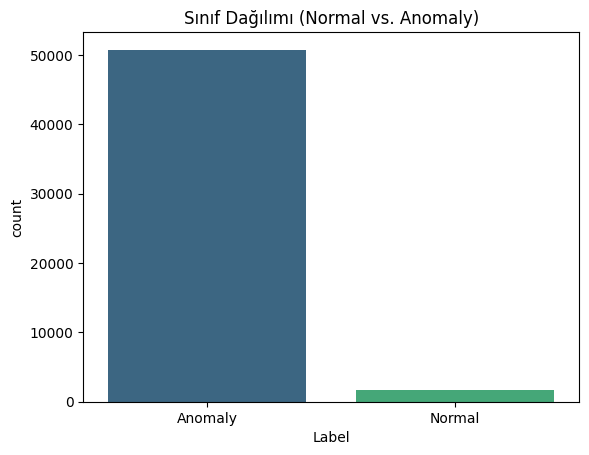

In [9]:
sns.countplot(x='Label', data=df, palette='viridis')
plt.title("Sınıf Dağılımı (Normal vs. Anomaly)")
plt.show()

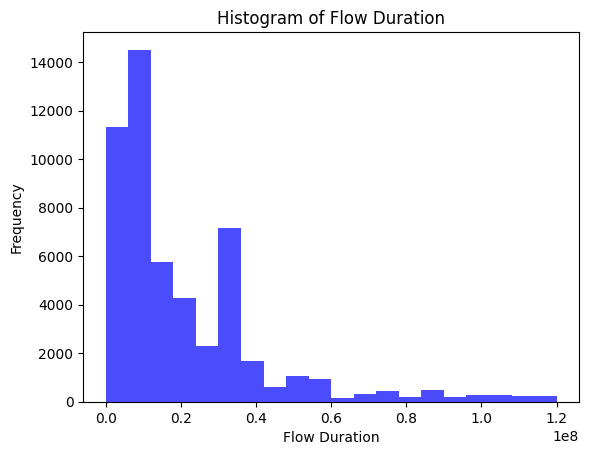

In [10]:
# Histogram of a numerical feature
plt.hist(df['Flow_Duration'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Flow Duration')
plt.show()

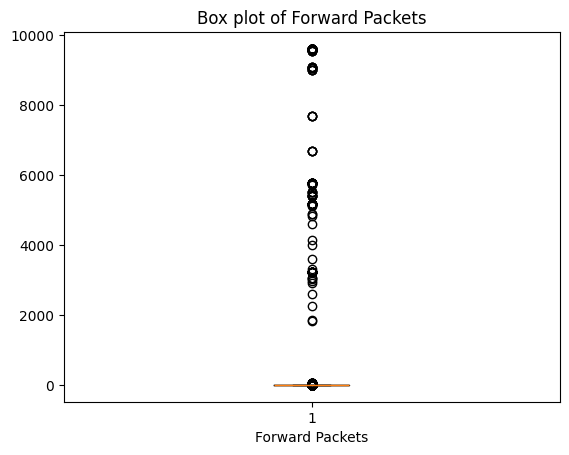

In [11]:
# Box plot of a numerical feature
plt.boxplot(df['Tot_Fwd_Pkts'])
plt.xlabel('Forward Packets')
plt.title('Box plot of Forward Packets')
plt.show()

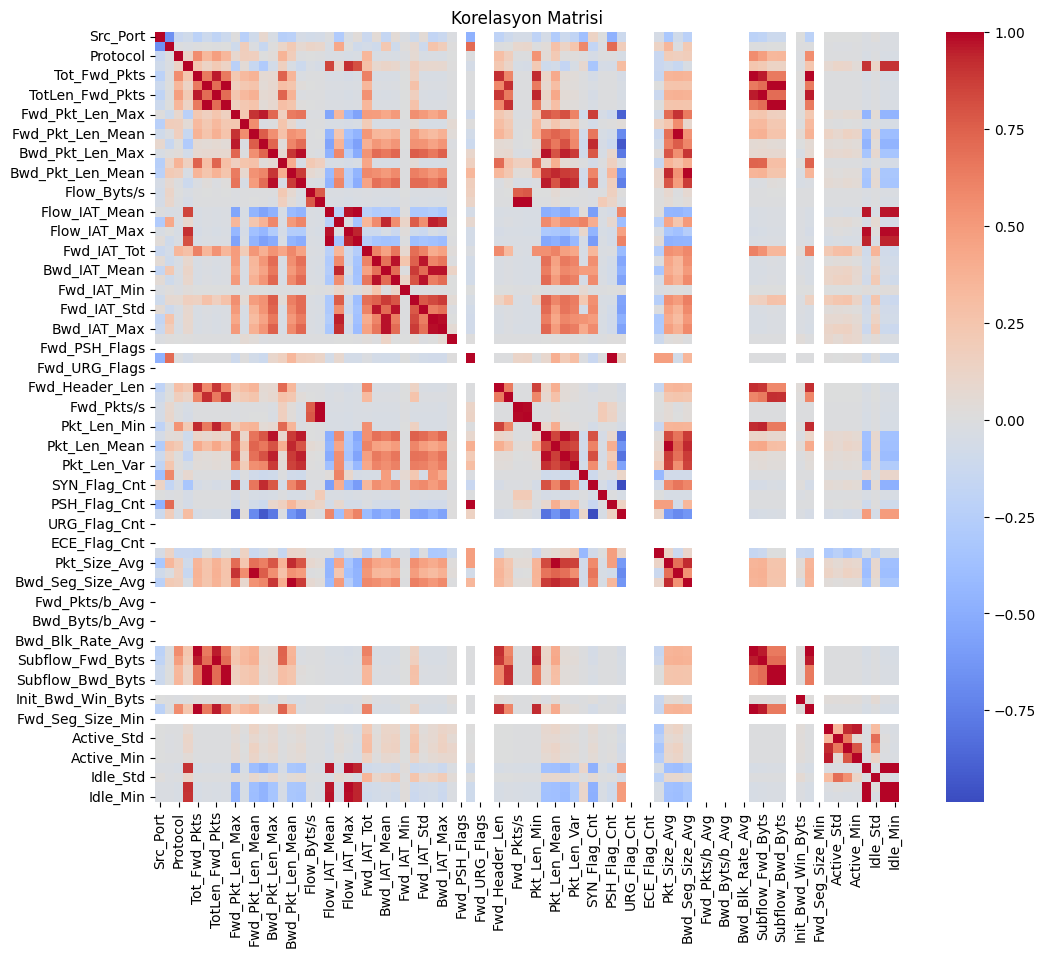

In [12]:
# Sayısal kolonları filtrele
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Korelasyon matrisi
correlation_matrix = df[numeric_cols].corr()

# Korelasyon ısı haritası
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()


1.2 FEATURE SELECTION and FEATURE ENGINEERING

In [19]:
columns_to_remove = []

for column in df.columns:
    unique_values = df[column].nunique()
    if df[column].nunique() == 1:
        print(f"Sütun '{column}' tüm değerleriyle sabit. Bu sütun eğitim için anlamsız olabilir. ")
        columns_to_remove.append(column)

df_cleaned = df.drop(columns=columns_to_remove)

Sütun 'Fwd_PSH_Flags' tüm değerleriyle sabit. Bu sütun eğitim için anlamsız olabilir. 
Sütun 'Fwd_URG_Flags' tüm değerleriyle sabit. Bu sütun eğitim için anlamsız olabilir. 
Sütun 'Bwd_URG_Flags' tüm değerleriyle sabit. Bu sütun eğitim için anlamsız olabilir. 
Sütun 'URG_Flag_Cnt' tüm değerleriyle sabit. Bu sütun eğitim için anlamsız olabilir. 
Sütun 'CWE_Flag_Count' tüm değerleriyle sabit. Bu sütun eğitim için anlamsız olabilir. 
Sütun 'ECE_Flag_Cnt' tüm değerleriyle sabit. Bu sütun eğitim için anlamsız olabilir. 
Sütun 'Fwd_Byts/b_Avg' tüm değerleriyle sabit. Bu sütun eğitim için anlamsız olabilir. 
Sütun 'Fwd_Pkts/b_Avg' tüm değerleriyle sabit. Bu sütun eğitim için anlamsız olabilir. 
Sütun 'Fwd_Blk_Rate_Avg' tüm değerleriyle sabit. Bu sütun eğitim için anlamsız olabilir. 
Sütun 'Bwd_Byts/b_Avg' tüm değerleriyle sabit. Bu sütun eğitim için anlamsız olabilir. 
Sütun 'Bwd_Pkts/b_Avg' tüm değerleriyle sabit. Bu sütun eğitim için anlamsız olabilir. 
Sütun 'Bwd_Blk_Rate_Avg' tüm değerler

In [20]:
print(f"Çıkarılan sütunlar: {columns_to_remove}")

Çıkarılan sütunlar: ['Fwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'URG_Flag_Cnt', 'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg', 'Init_Fwd_Win_Byts', 'Fwd_Seg_Size_Min']


In [22]:
# Eksik değerlerin kontrolü
null_values = df_cleaned.isnull().sum()
print('Display columns with null values')
null_columns = null_values[null_values > 0]
if not null_columns.empty:
    print('Columns with null values:')
    print(null_columns)
else:
    print('No null values found in the dataset.')


Display columns with null values
Columns with null values:
Flow_Pkts/s    3
dtype: int64


In [23]:
# Sayısal kolonların eksik değerlerini ortalama ile doldur
numeric_cols = df_cleaned.select_dtypes(include=["float64", "int64"]).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(lambda col: col.fillna(col.mean()), axis=0)

# Eksik değerlerin tekrar kontrolü
null_values_after = df_cleaned.isnull().sum()
print("Display columns with null values (after filling):")
null_columns_after = null_values_after[null_values_after > 0]
if not null_columns_after.empty:
    print("Columns with null values:")
    print(null_columns_after)
else:
    print("No null values found in the dataset.")


Display columns with null values (after filling):
No null values found in the dataset.


In [24]:
# Sonsuzluk değerlerini NaN ile değiştir
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# Yalnızca sayısal sütunları seç
numerical_columns = df_cleaned.select_dtypes(include=['number'])

# NaN değerleri, her sütunun ortalaması ile doldur
numerical_columns_filled = numerical_columns.fillna(numerical_columns.mean())

# Sayısal veriyi standardize et
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns_filled)

# Standardize edilmiş veriyi df_cleaned üzerinde güncelle
df_cleaned[numerical_columns_filled.columns] = numerical_columns_scaled


             PC1        PC2    Label
0       0.648542  -0.562166  Anomaly
1       0.950666  -0.589320  Anomaly
2       0.655871  -0.562791  Anomaly
3       1.026433  -0.596544  Anomaly
4       0.984640  -0.592548  Anomaly
...          ...        ...      ...
52461  15.426541  20.841401   Normal
52462  36.062478  67.262054   Normal
52463  24.540249  40.556156   Normal
52464   6.199624  14.669763   Normal
52465   8.863336   1.569796   Normal

[52466 rows x 3 columns]


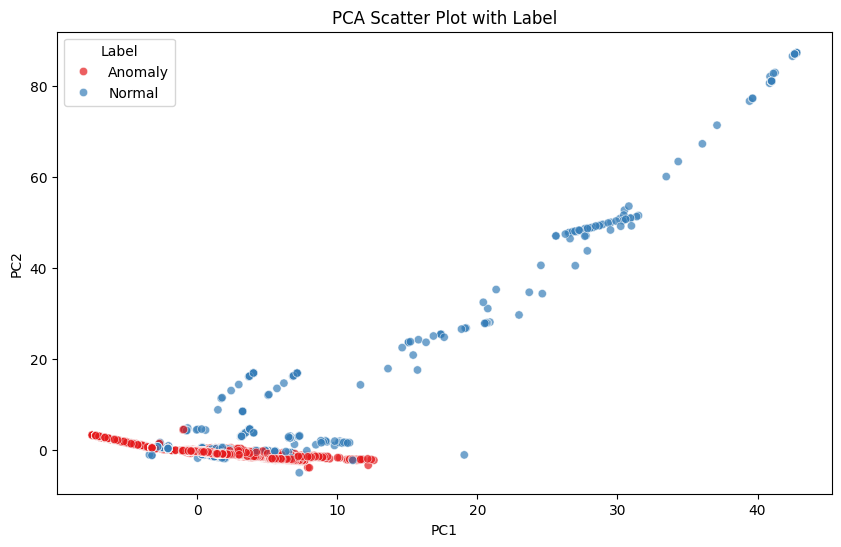

In [ ]:
#PCA yaptık ama kullanmadık çünkü zaten modeli eğitme süresi oldukça kısa, gerek duymadık. Sadece göstermek için yaptık.

# PCA işlemi gerçekleştirme
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_columns_scaled)

# PCA sonuçları için DataFrame oluştur
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# PCA sonuçlarını etiketlerle birleştir
pca_df['Label'] = df_cleaned['Label']
print(pca_df)

# PCA sonuçlarını etiketlerle görselleştir
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Label', palette='Set1', alpha=0.7)
plt.title('PCA Scatter Plot with Label')
plt.show()

In [26]:
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Label', 'Cat', 'Sub_Cat']


In [27]:
# Drop the specified columns from df_cleaned
df_cleaned = df_cleaned.drop(columns=['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp'])


In [28]:
# Kategorik verileri encodelama
columns_to_encode = ['Label', 'Cat', 'Sub_Cat']

label_encoders = {}

for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df_cleaned[column] = label_encoders[column].fit_transform(df_cleaned[column])
    print(f"'{column}' sütunu kodlandı.")
    print(f"Sınıflar: {label_encoders[column].classes_}")

# Kodlama sonrası kontrol
print("\nKodlanmış veri:")
print(df_cleaned.head())


'Label' sütunu kodlandı.
Sınıflar: ['Anomaly' 'Normal']
'Cat' sütunu kodlandı.
Sınıflar: ['DoS' 'Normal']
'Sub_Cat' sütunu kodlandı.
Sınıflar: ['DoS_HTTP' 'Normal']

Kodlanmış veri:
   Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0  0.364547 -0.167995 -0.043966      -0.768963     -0.053808     -0.024729   
1  0.364378 -0.167995 -0.043966      -0.768941     -0.053808     -0.024729   
2  0.364716 -0.167995 -0.043966      -0.768974     -0.053808     -0.024729   
3  0.364884 -0.167995 -0.043966      -0.768987     -0.053808     -0.024729   
4  0.365053 -0.167995 -0.043966      -0.768999     -0.053808     -0.024729   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  ...  \
0        -0.048819        -0.030821         0.262900        -0.062076  ...   
1        -0.048606        -0.030821         0.599119        -0.062076  ...   
2        -0.048814        -0.030821         0.271202        -0.062076  ...   
3        -0.048553        -0.030821  

In [29]:
# 1. Yeni feature: Paket Hızı (saniye başına paket)
df_cleaned['Packet_Rate'] = df_cleaned['Tot_Fwd_Pkts'] / df_cleaned['Flow_Duration']

# 2. Yeni feature: Paket Boyutu Dağılımı (Forward Paketin, Toplam Pakete oranı)
df_cleaned['Packet_Size_Distribution'] = df_cleaned['Tot_Fwd_Pkts'] / (df_cleaned['Tot_Fwd_Pkts'] + df_cleaned['Tot_Bwd_Pkts'])

# 3. Yeni feature: Belirli Protokol Türlerinin Frekansı
# Protokol sütununda türler mevcutsa, frekansları ekleyelim
protocol_counts = df_cleaned['Protocol'].value_counts(normalize=True)  # Protokoller arasındaki relatif frekans
df_cleaned['Protocol_Frequency'] = df_cleaned['Protocol'].map(protocol_counts)

print(df_cleaned.head())


   Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0  0.364547 -0.167995 -0.043966      -0.768963     -0.053808     -0.024729   
1  0.364378 -0.167995 -0.043966      -0.768941     -0.053808     -0.024729   
2  0.364716 -0.167995 -0.043966      -0.768974     -0.053808     -0.024729   
3  0.364884 -0.167995 -0.043966      -0.768987     -0.053808     -0.024729   
4  0.365053 -0.167995 -0.043966      -0.768999     -0.053808     -0.024729   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  ...  \
0        -0.048819        -0.030821         0.262900        -0.062076  ...   
1        -0.048606        -0.030821         0.599119        -0.062076  ...   
2        -0.048814        -0.030821         0.271202        -0.062076  ...   
3        -0.048553        -0.030821         0.682136        -0.062076  ...   
4        -0.048582        -0.030821         0.636477        -0.062076  ...   

   Idle_Mean  Idle_Std  Idle_Max  Idle_Min  Label  Cat  Sub_Ca

2-TRADITIONAL MACHINE LEARNING ALGORITHMS

2.1 RANDOM FOREST

In [30]:
# Veriyi featurelar ve label sütunu olarak işaretledik 
X = df_cleaned.drop(columns=['Label']) 
y = df_cleaned['Label'] 

# Veriyi eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Infinity değerlerini NaN ile değiştirip mean ile doldurdum
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train = X_train.fillna(X_train.mean())

X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test = X_test.fillna(X_test.mean())

# Random Forest modelini tanımla
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitim verisi ile eğitelim
rf_model.fit(X_train, y_train)

# Test verisiyle tahmin yapalım
y_pred = rf_model.predict(X_test)


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10156
           1       1.00      1.00      1.00       338

    accuracy                           1.00     10494
   macro avg       1.00      1.00      1.00     10494
weighted avg       1.00      1.00      1.00     10494



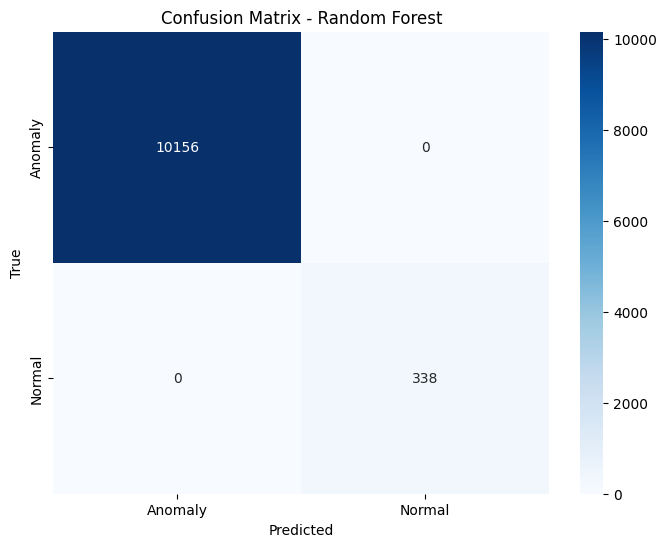

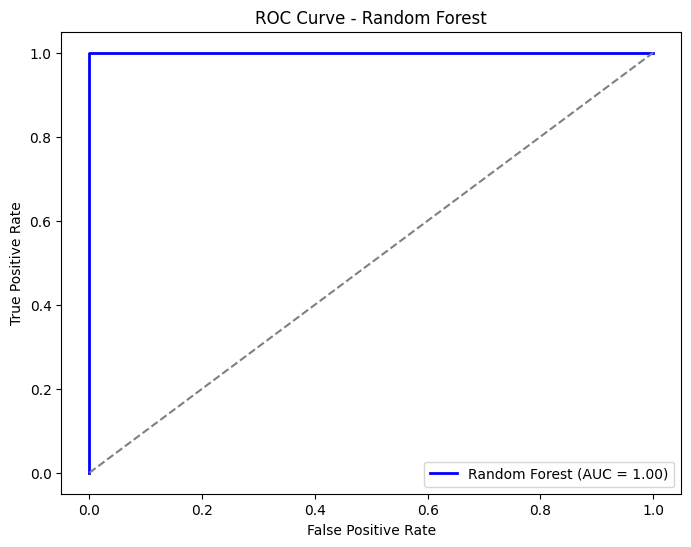

In [31]:
# Modelin başarı sonuçları
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC eğrisini çizmek için olasılık tahminleri (pozitif sınıf için)
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Sadece 'Normal' (1) sınıfı olasılıkları

# ROC eğrisini hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # AUC değerini hesapla

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Rastgele tahmin çizgisi (45° doğrusunu gösterir)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

2.2 XGBOOST

In [33]:
# Veriyi featurelar ve label sütunu olarak işaretledik 
X = df_cleaned.drop(['Label'], axis=1)  
y = df_cleaned['Label']  

# Veriyi eğitim ve test setlerine ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Infinity değerlerini NaN ile değiştirip mean ile doldurma
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train = X_train.fillna(X_train.mean())

X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test = X_test.fillna(X_test.mean())

# XGBoost modelini tanımlıyoruz
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Modeli eğitim verisi ile eğitiyoruz
xgb_model.fit(X_train, y_train)

# Test verisi ile tahmin yapıyoruz
y_pred = xgb_model.predict(X_test)


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10156
           1       1.00      1.00      1.00       338

    accuracy                           1.00     10494
   macro avg       1.00      1.00      1.00     10494
weighted avg       1.00      1.00      1.00     10494



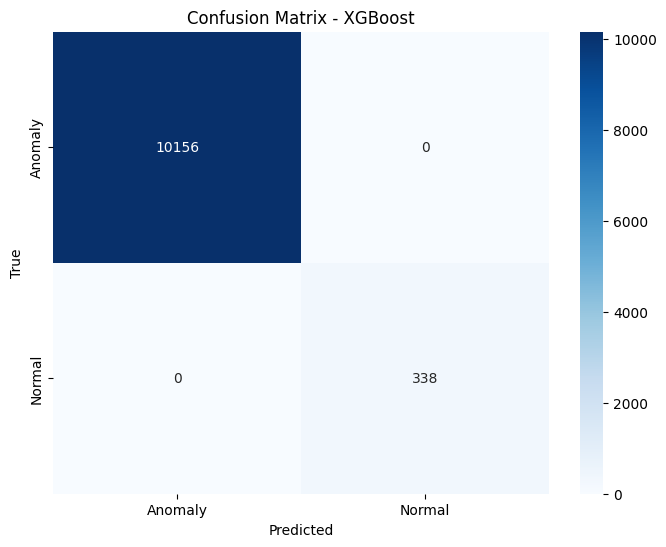

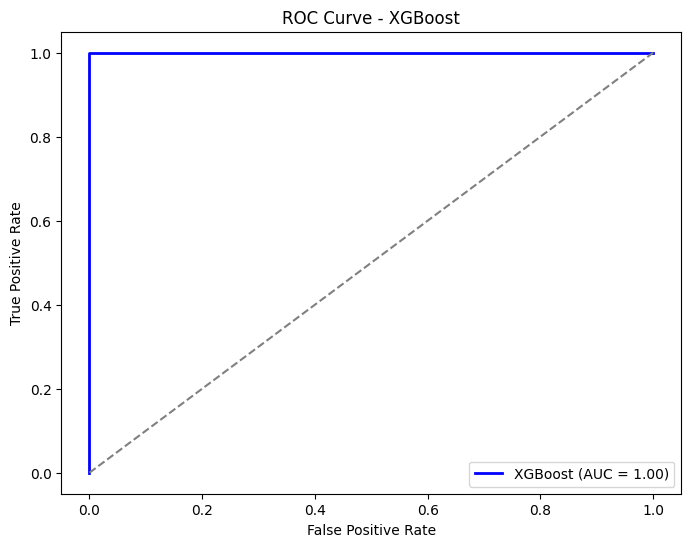

In [34]:
# Modelin başarı sonuçlarını görelim
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix'i görselleştirelim
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# ROC eğrisini çizmek için olasılık tahminleri alıyoruz (pozitif sınıf için)
y_probs = xgb_model.predict_proba(X_test)[:, 1]  # Sadece 'Normal' (1) sınıfı olasılıkları

# ROC eğrisini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # AUC değerini hesapla

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Rastgele tahmin çizgisi (45° doğrusunu gösterir)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

2.3 LightGBM

In [35]:
# LightGBM modelini tanımlayalım
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)

# Modeli eğitim verisi ile eğitelim
lgb_model.fit(X_train, y_train)

# Test verisi ile tahmin yapalım
y_pred = lgb_model.predict(X_test)


[LightGBM] [Info] Number of positive: 1362, number of negative: 40610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11168
[LightGBM] [Info] Number of data points in the train set: 41972, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032450 -> initscore=-3.395060
[LightGBM] [Info] Start training from score -3.395060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10156
           1       1.00      1.00      1.00       338

    accuracy                           1.00     10494
   macro avg       1.00      1.00      1.00     10494
weighted avg       1.00      1.00      1.00     10494



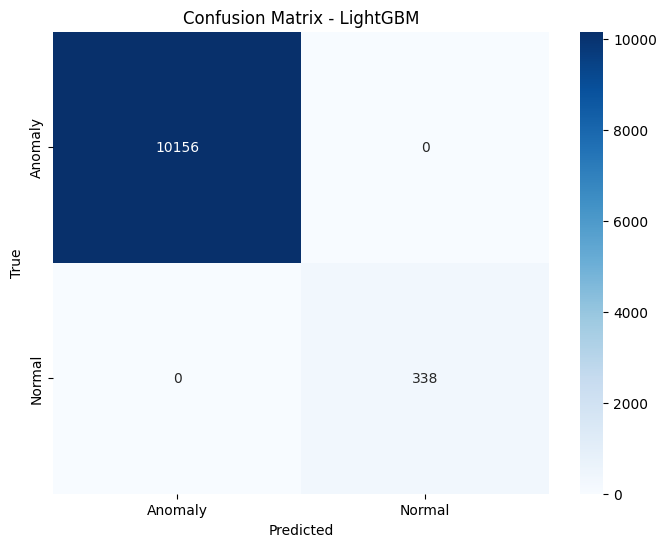

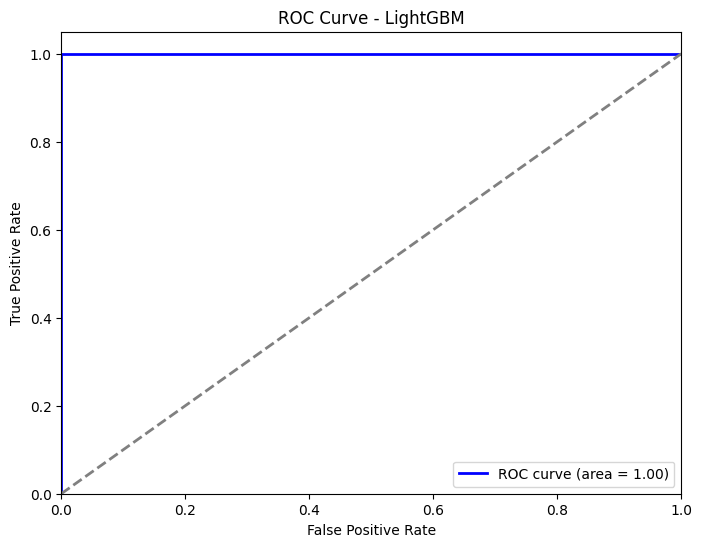

In [36]:
# Modelin başarı sonuçlarını görelim
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix'i görselleştirelim
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LightGBM')
plt.show()

# Y_pred_proba, modelin olasılık tahminlerini almak için
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# ROC eğrisini çizelim
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.show()

2.4 LOGISTIC REGRESSION

In [38]:
# Logistic Regression modelini oluştur
log_reg_model = LogisticRegression(random_state=42, max_iter=200)

# Modeli eğitim verisiyle eğit -zaten önceki modellerde x_train, y_train belirlemiştik-
log_reg_model.fit(X_train, y_train)

# Test verisiyle tahmin yap
y_pred = log_reg_model.predict(X_test)

Accuracy: 0.9999047074518773
Precision: 1.0
Recall: 0.9970414201183432
F1 Score: 0.9985185185185185
AUC: 1.0


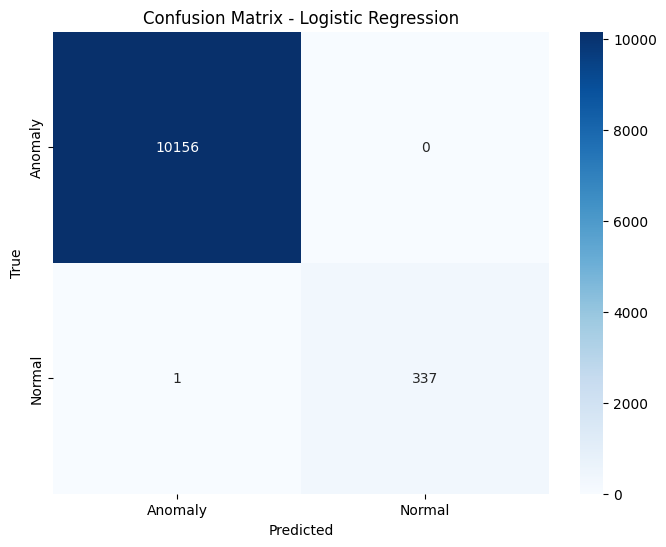

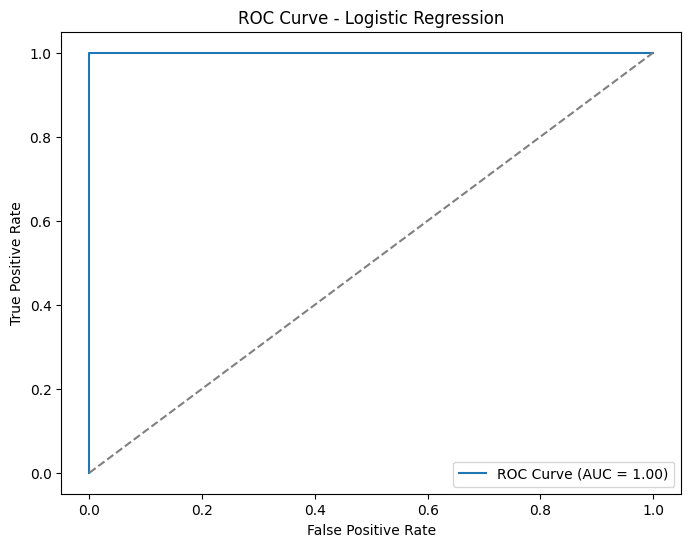

In [39]:
# Modelin başarı sonuçları
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
auc = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:,1])

# Sonuçları yazdır
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")

# Confusion Matrix'i görselleştirelim
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# ROC eğrisini çizelim
fpr, tpr, thresholds = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

3-RNN, LSTM and GRU MODELS

3.1 RNN

In [44]:
# Veri yeniden şekillendirme
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Model oluşturma
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='tanh'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1, activation='sigmoid'))

# Gradient clipping ile optimizer
optimizer = Adam(learning_rate=0.001, clipvalue=1.0)
rnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model eğitimi
rnn_model.fit(X_train_reshaped, y_train, epochs=5, batch_size=16, validation_data=(X_test_reshaped, y_test))

# Tahminler
y_pred_rnn_prob = rnn_model.predict(X_test_reshaped)
y_pred_rnn_bin = (y_pred_rnn_prob > 0.5).astype(int)

# Doğrulama
accuracy_rnn = accuracy_score(y_test, y_pred_rnn_bin)
precision_rnn = precision_score(y_test, y_pred_rnn_bin)
recall_rnn = recall_score(y_test, y_pred_rnn_bin)
f1_rnn = f1_score(y_test, y_pred_rnn_bin)
print(f"Accuracy: {accuracy_rnn}, Precision: {precision_rnn}, Recall: {recall_rnn}, F1: {f1_rnn}")


Epoch 1/5


c:\Users\BEYZA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2624/2624 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9755 - loss: 0.0699 - val_accuracy: 1.0000 - val_loss: 4.0145e-04
Epoch 2/5
2624/2624 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9999 - loss: 6.2534e-04 - val_accuracy: 0.9997 - val_loss: 6.6973e-04
Epoch 3/5
2624/2624 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9998 - loss: 5.8424e-04 - val_accuracy: 1.0000 - val_loss: 1.2652e-04
Epoch 4/5
2624/2624 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9999 - loss: 1.9510e-04 - val_accuracy: 1.0000 - val_loss: 2.6696e-05
Epoch 5/5
2624/2624 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9998 - loss: 6.2014e-04 - val_accuracy: 1.0000 - val_loss: 1.3198e-04
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0


RNN Accuracy: 1.0
RNN Precision: 1.0
RNN Recall: 1.0
RNN F1 Score: 1.0
RNN AUC: 1.0
Confusion Matrix:
 [[10156     0]
 [    0   338]]


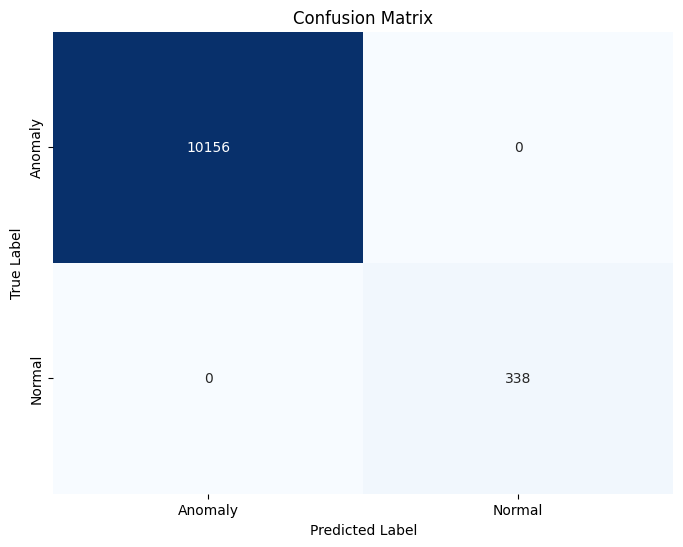

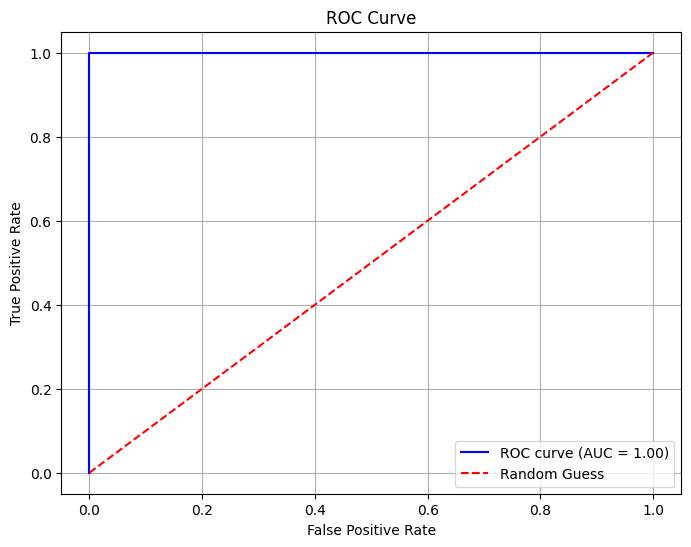

In [49]:
del auc
from sklearn.metrics import auc  # Doğru import ettiğimize emin olalım

# ROC ve AUC Hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rnn_prob)
roc_auc_value = auc(fpr, tpr)  

# Sonuçlar
print(f"RNN Accuracy: {accuracy_rnn}")
print(f"RNN Precision: {precision_rnn}")
print(f"RNN Recall: {recall_rnn}")
print(f"RNN F1 Score: {f1_rnn}")
print(f"RNN AUC: {roc_auc_value}")

# Confusion Matrix
cm_rnn = confusion_matrix(y_test, y_pred_rnn_bin)
print("Confusion Matrix:\n", cm_rnn)

# Confusion Matrix Grafiği
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Anomaly", "Normal"], yticklabels=["Anomaly", "Normal"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Eğrisi
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


3.2 LSTM

In [50]:
# LSTM Modeli oluşturuluyor
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='tanh', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))  # 0 ve 1 sınıfları için sigmoid aktivasyonu
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# LSTM modelini eğitiyoruz
lstm_model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32)

# Test verisiyle tahmin yapıyoruz
y_pred_lstm = lstm_model.predict(X_test_reshaped)


Epoch 1/5


c:\Users\BEYZA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1312/1312 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9895 - loss: 0.0907
Epoch 2/5
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9997 - loss: 0.0013
Epoch 3/5
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9996 - loss: 8.0211e-04
Epoch 4/5
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9999 - loss: 4.1721e-04
Epoch 5/5
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9999 - loss: 2.6626e-04
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


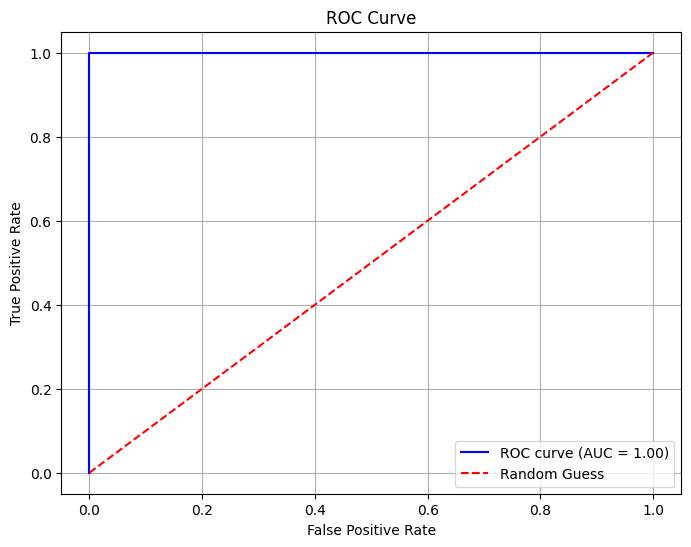

LSTM Accuracy: 1.0
LSTM Precision: 1.0
LSTM Recall: 1.0
LSTM F1-score: 1.0
LSTM AUC: 1.0
Confusion Matrix:
[[10156     0]
 [    0   338]]


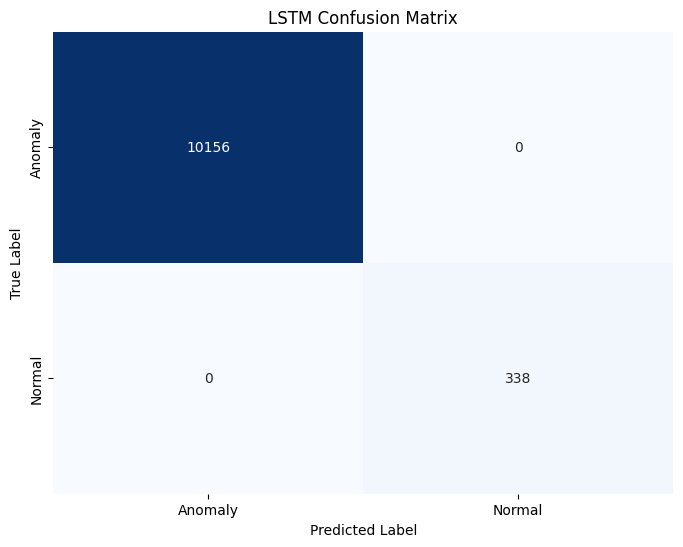

In [51]:
# ROC AUC Hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lstm)
roc_auc_lstm = auc(fpr, tpr)

# Metrikleri hesaplıyoruz
accuracy_lstm = accuracy_score(y_test, (y_pred_lstm > 0.5).astype(int))
precision_lstm = precision_score(y_test, (y_pred_lstm > 0.5).astype(int))
recall_lstm = recall_score(y_test, (y_pred_lstm > 0.5).astype(int))
f1_lstm = f1_score(y_test, (y_pred_lstm > 0.5).astype(int))

# ROC Curve'ü çiziyoruz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Sonuçları yazdırıyoruz
print(f"LSTM Accuracy: {accuracy_lstm}")
print(f"LSTM Precision: {precision_lstm}")
print(f"LSTM Recall: {recall_lstm}")
print(f"LSTM F1-score: {f1_lstm}")
print(f"LSTM AUC: {roc_auc_lstm}")

# Confusion Matrix
cm_lstm = confusion_matrix(y_test, (y_pred_lstm > 0.5).astype(int))
print("Confusion Matrix:")
print(cm_lstm)

# Confusion Matrix'i görselleştiriyoruz
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Anomaly", "Normal"], yticklabels=["Anomaly", "Normal"])

plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


3.3 GRU

In [53]:
# GRU Modeli oluşturuluyor
gru_model = Sequential()
gru_model.add(GRU(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
gru_model.add(Dense(1, activation='sigmoid'))  # 0 ve 1 sınıfları için sigmoid aktivasyonu
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# GRU modelini eğitiyoruz
gru_model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32)

# Test verisiyle tahmin yapıyoruz
y_pred_gru = gru_model.predict(X_test_reshaped)

Epoch 1/5
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9932 - loss: 0.0664
Epoch 2/5
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9998 - loss: 7.9560e-04
Epoch 3/5
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9999 - loss: 2.3839e-04
Epoch 4/5
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 1.0000 - loss: 8.7413e-05
Epoch 5/5
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 3.5560e-05
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


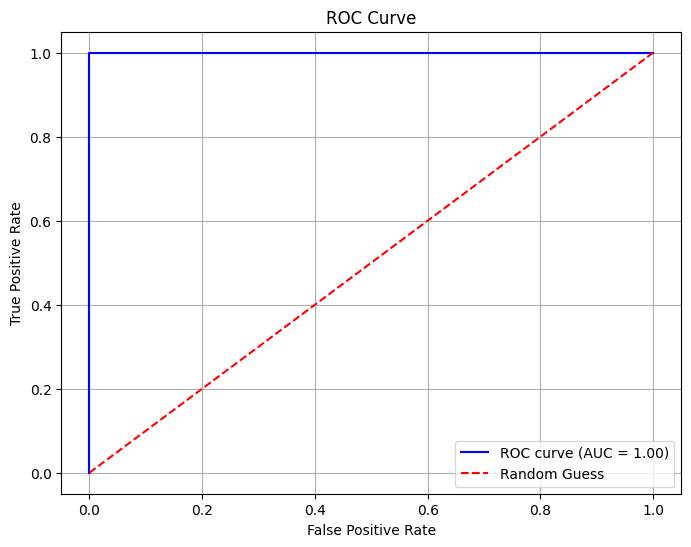

GRU Accuracy: 1.0
GRU Precision: 1.0
GRU Recall: 1.0
GRU F1-score: 1.0
GRU AUC: 1.0
Confusion Matrix:
[[10156     0]
 [    0   338]]


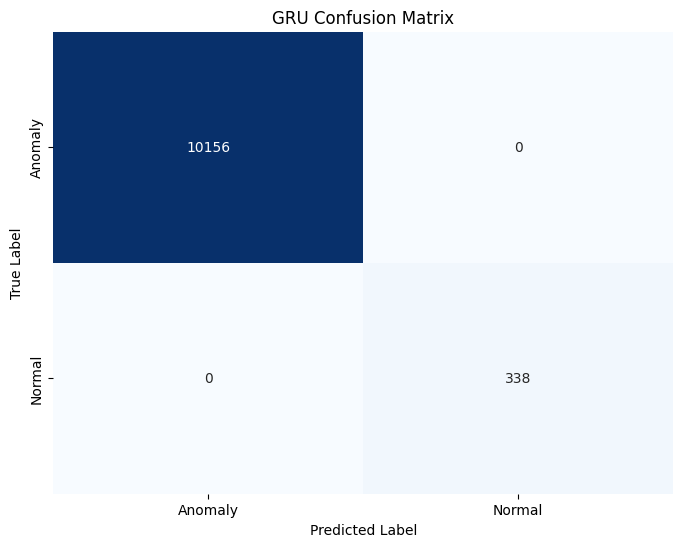

In [54]:
# ROC AUC Hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gru)
roc_auc_gru = auc(fpr, tpr)

# Metrikleri hesaplıyoruz
accuracy_gru = accuracy_score(y_test, (y_pred_gru > 0.5).astype(int))
precision_gru = precision_score(y_test, (y_pred_gru > 0.5).astype(int))
recall_gru = recall_score(y_test, (y_pred_gru > 0.5).astype(int))
f1_gru = f1_score(y_test, (y_pred_gru > 0.5).astype(int))

# ROC Curve'ü çiziyoruz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_gru:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Sonuçları yazdırıyoruz
print(f"GRU Accuracy: {accuracy_gru}")
print(f"GRU Precision: {precision_gru}")
print(f"GRU Recall: {recall_gru}")
print(f"GRU F1-score: {f1_gru}")
print(f"GRU AUC: {roc_auc_gru}")

# Confusion Matrix
cm_gru = confusion_matrix(y_test, (y_pred_gru > 0.5).astype(int))
print("Confusion Matrix:")
print(cm_gru)

# Confusion Matrix'i görselleştiriyoruz
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gru, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Anomaly", "Normal"], yticklabels=["Anomaly", "Normal"])

plt.title("GRU Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


4- ENSEMBLE LEARNING THAT COMBINES CNN, LSTM, BILSTM and GRU

In [55]:
# DataFrame'den NumPy dizisine çevirme
X_train_numpy = X_train.values  
X_test_numpy = X_test.values 

# Veriyi şekillendirelim
X_train_reshaped = X_train_numpy.reshape((X_train_numpy.shape[0], 1, X_train_numpy.shape[1]))  # (samples, time_steps=1, features=70)
X_test_reshaped = X_test_numpy.reshape((X_test_numpy.shape[0], 1, X_test_numpy.shape[1]))  # (samples, time_steps=1, features=70)

# Input shape (time_steps, features)
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])  # = (1, 70)

# CNN Modeli
cnn_input = Input(shape=input_shape)  # shape=(1, 70)
cnn = Conv1D(filters=64, kernel_size=2, activation='relu', padding='same')(cnn_input)  # 1 zaman adımı, 70 özellik
cnn = Flatten()(cnn) 

lstm_input = Input(shape=input_shape)
lstm = LSTM(64)(lstm_input)

bilstm_input = Input(shape=input_shape)
bilstm = Bidirectional(LSTM(64))(bilstm_input)

gru_input = Input(shape=input_shape)
gru = GRU(64)(gru_input)

# Farklı katmanların çıktılarının birleştirilmesi
combined = tf.keras.layers.concatenate([cnn, lstm, bilstm, gru])

# Fully Connected Layer ve Çıkış Katmanı ekliyoruz
x = Dense(64, activation='relu')(combined)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)  # ikili sınıflandırma için sigmoid aktivasyonu

# Son Ensemble Modelini oluşturuyoruz
ensemble_model = Model(inputs=[cnn_input, lstm_input, bilstm_input, gru_input], outputs=output)

# Modeli derliyoruz
optimizer = Adam(learning_rate=0.0001)
ensemble_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model özeti
ensemble_model.summary()

# Ensemble modelini CNN, LSTM, BiLSTM, ve GRU için eğitim verileriyle eğitme
ensemble_model.fit([X_train_reshaped, X_train_reshaped, X_train_reshaped, X_train_reshaped], 
                   y_train, 
                   epochs=10, 
                   batch_size=32, 
                   validation_data=([X_test_reshaped, X_test_reshaped, X_test_reshaped, X_test_reshaped], y_test))

# Test Verileri
loss, accuracy = ensemble_model.evaluate([X_test_reshaped, X_test_reshaped, X_test_reshaped, X_test_reshaped], y_test)
print(f"Ensemble Model Accuracy: {accuracy}")


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 1, 70)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 1, 64)     │      9,024 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_9       │ (None, 1, 70)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_10      │ (None, 1, 70)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_11      │ (None, 1, 70)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 64)        │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     34,560 │ input_layer_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │     69,120 │ input_layer_10[0… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_2 (GRU)         │ (None, 64)        │     26,112 │ input_layer_11[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 320)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ lstm_1[0][0],     │
│                     │                   │            │ bidirectional[0]… │
│                     │                   │            │ gru_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │     20,544 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │         65 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 159,425 (622.75 KB)

 Trainable params: 159,425 (622.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9884 - loss: 0.1236 - val_accuracy: 0.9998 - val_loss: 0.0018
Epoch 2/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9997 - loss: 0.0020 - val_accuracy: 0.9999 - val_loss: 5.4026e-04
Epoch 3/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 3.2968e-04
Epoch 4/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9999 - loss: 5.2993e-04 - val_accuracy: 0.9999 - val_loss: 1.7461e-04
Epoch 5/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9998 - loss: 3.3275e-04 - val_accuracy: 1.0000 - val_loss: 8.7115e-05
Epoch 6/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9998 - loss: 3.1188e-04 - val_accuracy: 1.0000 - val_loss: 1.0848e-04
Epoch 7/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9999 - loss: 3.3606e-04 - val_accuracy: 1.0000 - val_loss: 3.1024e-05
Epoch 8/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 9

328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


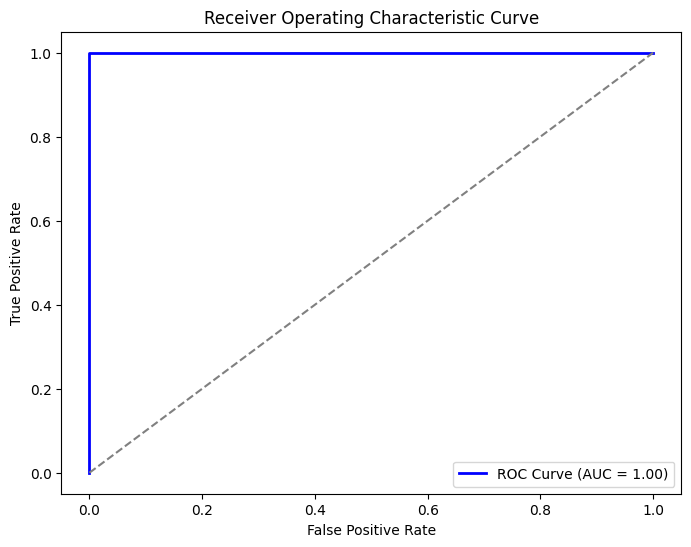

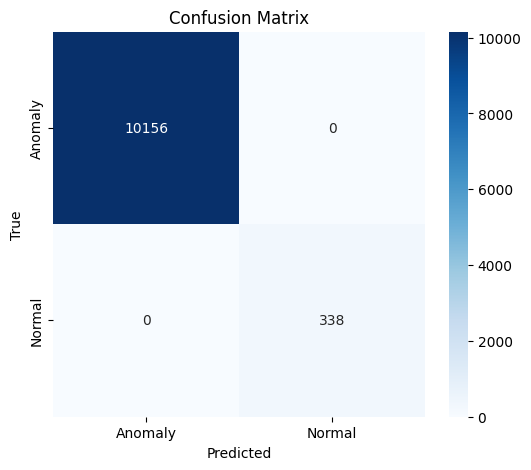

In [56]:
# Tahmin
y_pred_prob = ensemble_model.predict([X_test_reshaped, X_test_reshaped, X_test_reshaped, X_test_reshaped])  
y_pred = (y_pred_prob > 0.5).astype(int)  

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random Classifier için diyagonal çizgi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Anomaly', 'Normal'], yticklabels=['Anomaly', 'Normal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()